In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Dataset 

In [2]:
data = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

#### Now, let's understand the data using pandas library
* .info(): gives the columns and its datatypes
* .head(): returns first 5 rows from the dataset
* .tail(): returns last 5 rows from the dataset
* .describe(): Descriptive statistics of the dataset


In [3]:
data.columns = data.columns.str.replace(' ', '_')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The data has one numeric column i.e., Rating and 12 objects.

In [5]:
data1 = data.head()
data2 = data.tail()
concat_data = pd.concat([data1,data2],axis=0,ignore_index=True)
concat_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data.shape

(10841, 13)

##### Missing Values in the dataset

In [8]:
data.isnull().sum().sort_values(ascending = False)

Rating            1474
Current_Ver          8
Android_Ver          3
Type                 1
Content_Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last_Updated         0
dtype: int64

Rating has highest number of missing values

## Data Preprocessing / Data Cleaning
Let's explore each feature individually 

## Rating 

In [9]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

For entries to be right we should make sure they fall within the range of 1 to 5

In [10]:
print("Range: ", data.Rating.min(),"-",data.Rating.max())

Range:  1.0 - 19.0


19 is the incorrect entry so replacing it to 0

In [11]:
data.loc[data['Rating']>5,'Rating']=0
print("Range: ", data.Rating.min(),"-",data.Rating.max())

Range:  0.0 - 5.0


#### Handling missing data

Using Meadian to fill the missing data in Rating. Meadian is more robust than mean.

In [12]:
rating_median = data["Rating"].median()
print(rating_median)
data["Rating"].fillna(rating_median, inplace=True)

4.3


In [13]:
data['Rating'].isna().unique()

array([False])

Checking the type of data, to see if it needs to be converted to numeric

In [14]:
data.Rating.dtype

dtype('float64')

Rating is already numeric.

## Size
let's see the unique values and its occurance in size feature

In [15]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

It can be seen that data has metric prefixes K and M along with another string. Replacing k and M with their values to convert values to numeric.

In [16]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

Now, we have two types of values in our Size data.

1. exponential values (not yet converted to string)
2. Strings (that cannot be converted into numeric)

In [17]:
def is_convertable(v):
    try:
        float(v)
        return float(v)
    except ValueError:
        return v
    
data.Size=data.Size.apply(lambda x: is_convertable(x))
data.Size.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: object

In [18]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

In [19]:
data.Size=pd.to_numeric(data.Size)
data.Size.astype(float)

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 10841, dtype: float64

## Install
Checking unique values in Install feature

In [20]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

It can be seen that there a string, which we will be converting to nan here
and rest are numeric but with '+' and ',' which shall be removed to convert these into numeric type

In [21]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [22]:
data.Installs.str.isnumeric().sum()

10840

In [23]:
data.Installs.isna().value_counts()

False    10840
True         1
Name: Installs, dtype: int64

## Reviews
Checking if all values are numeric

In [24]:
data.Reviews.str.isnumeric().sum()

10840

One value is non numeric out of 10841. Lets find its value and id.

In [25]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,0.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

## Type
Let's check the unique values in Type feature

In [27]:
data.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

Removing the inconsistent data i.e., 0

In [28]:
print(data[data['Type']=='0'].index.values)

[10472]


In [29]:
data=data.drop(data.index[10472])

To check if the row is deleted

In [30]:
data[10471:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404000.0,100000,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4100000.0,10000000,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


## Price
Checking for unique values of price

In [31]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Data had $ sign which shall be removed to convert it to numeric

In [32]:
data.Price = data.Price.apply(lambda x: x.strip('$'))

In [33]:
data.Price=pd.to_numeric(data.Price)

In [34]:
data.Price.isna().value_counts()

False    10840
Name: Price, dtype: int64

## Category
Now let's check the category feature

In [35]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

The dta seems good it has no repetition or false data

## Content Rating

In [36]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [37]:
data.Content_Rating.isna().value_counts()

False    10840
Name: Content_Rating, dtype: int64

No repetition or missing or false values present. 

## Genres
Checking for unique values, inconsistent and repetition in data

In [38]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The data is in the format Genre;Subgenre. Lets divide the data into two columns, one as Main_Genres and the other as Sub_genre.

In [39]:
data['Main_Genres'] = data.Genres.apply(lambda x: x.split(';')[0])
data.Main_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Main_Genres, dtype: object

In [40]:
data['Sec_Genres'] = data.Genres.apply(lambda x: x.split(';')[-1])
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [41]:
genre = data.groupby(['Main_Genres','Sec_Genres'])
genre.size()

Main_Genres              Sec_Genres             
Action                   Action                     365
                         Action & Adventure          17
Adventure                Action & Adventure          13
                         Adventure                   75
                         Brain Games                  1
                                                   ... 
Video Players & Editors  Creativity                   2
                         Music & Video                3
                         Video Players & Editors    173
Weather                  Weather                     82
Word                     Word                        29
Length: 118, dtype: int64

In [42]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Main_Genres', 'Sec_Genres'],
      dtype='object')

## Last_Updated
Let's now inspect last updated column

In [43]:
data.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

Converting the string to date time format

In [44]:
from datetime import datetime,date
date=pd.to_datetime(data.Last_Updated)
date.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

## Android Version
Understanding the data

In [45]:
data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [46]:
data.loc[pd.isna(data['Android_Ver']), :].index

Int64Index([4453, 4490], dtype='int64')

Deleting the rows with Nan

In [47]:
data=data.drop(data.index[[4453, 4490]])

## Current Version

In [48]:
data.Current_Ver.value_counts().head(20)

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
1.0.2                   80
1.6                     65
1.0.3                   62
2.1                     61
3.0                     59
1.0.4                   58
1.7                     53
2.0.0                   51
1.0.5                   50
1.1.0                   49
Name: Current_Ver, dtype: int64

As vareis with device is of high volume im not changing it to nan

In [49]:
data.Current_Ver.isna().sum()

8

Converting 8 nan to 'Varies with device'.

In [50]:
data.Current_Ver=data.Current_Ver.replace(np.nan,'Varies with device')

## Data Visualization

Category Ratio using Donut plot

<AxesSubplot: xlabel='Installs', ylabel='count'>

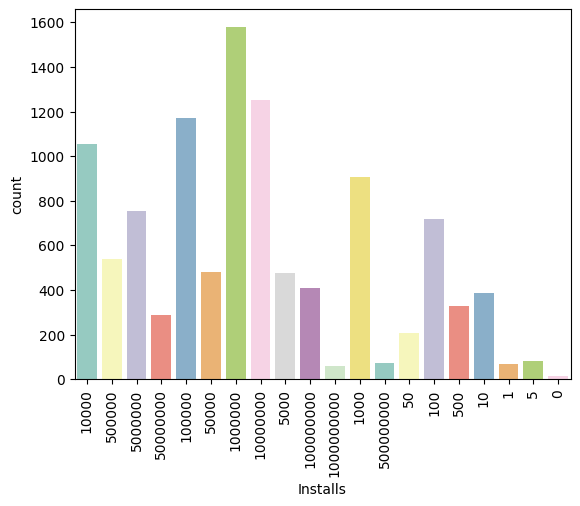

In [51]:
plt.xticks(rotation=90)
sns.countplot(data, x="Installs", palette="Set3")

In [52]:
labels = data.Category.unique()
values=[]
for i in labels:
    values.append(len(data[data.Category==i]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Box plot of first three most repeated Category (min,q1,median,q3,max value)

In [53]:
Cat1 = data[data.Category=="GAME"].Rating
Cat2 = data[data.Category=="FAMILY"].Rating
Cat3 = data[data.Category=="TOOLS"].Rating

fig = go.Figure()
fig.add_trace(go.Box(y=Cat1, name='GAME'))
fig.add_trace(go.Box(y=Cat2, name='FAMILY'))
fig.add_trace(go.Box(y=Cat3, name='TOOLS'))
fig.show()

Visualizing the distribution of Genres

In [54]:
px.histogram(data, color="Sec_Genres", y="Main_Genres", hover_data="Sec_Genres",opacity=1)

<AxesSubplot: xlabel='Type', ylabel='count'>

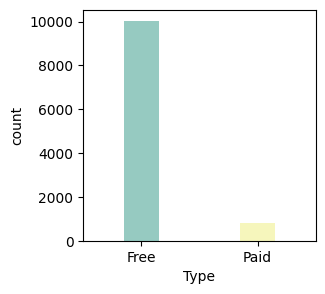

In [55]:
plt.subplots(figsize=(3,3))
sns.countplot(x="Type", data=data, palette="Set3", width = 0.3)

In [56]:
px.scatter(data, y="Category", x="Price",color="Type",hover_data=['Category'],template='plotly_dark')

<AxesSubplot: xlabel='Rating', ylabel='Count'>

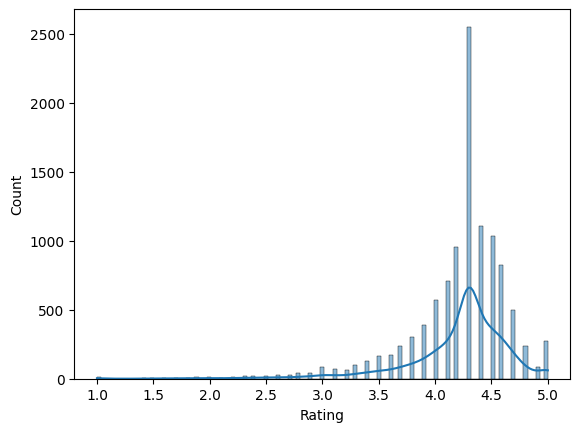

In [57]:
sns.histplot(data, x="Rating", kde = True)

## Thankyou!